In [25]:
# 25 May 2025

<h1 style="line-height:3rem;">Olympic</h1>

Included countries found in dataset: ['Pakistan']


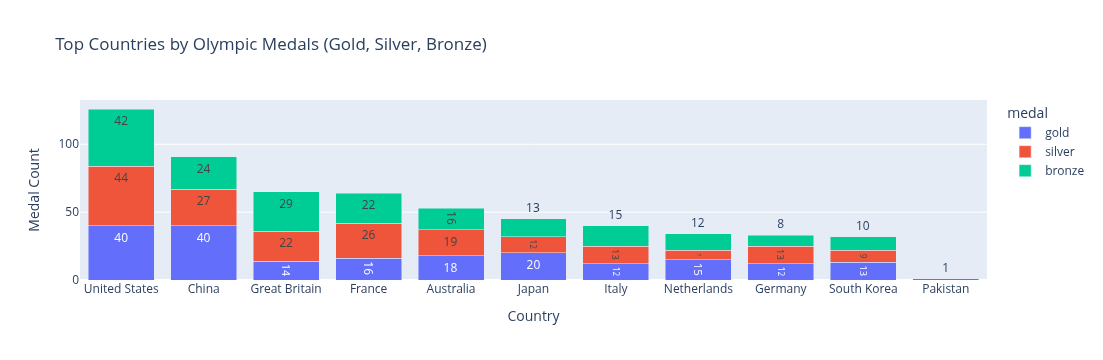

,country,country_code,gold,silver,bronze,total,gdp,gdp_year,population
0,United States,USA,40,44,42,126,81695.190000,2023,334.900000
1,China,CHN,40,27,24,91,12614.060000,2023,1410.700000
2,Great Britain,GBR,14,22,29,65,48866.600000,2023,68.300000
3,France,FRA,16,26,22,64,44460.820000,2023,68.200000
4,Australia,AUS,18,19,16,53,64711.770000,2023,26.600000
5,Japan,JPN,20,12,13,45,33834.390000,2023,124.500000
6,Italy,ITA,12,13,15,40,38373.170000,2023,58.800000
7,Netherlands,NLD,15,7,12,34,62536.730000,2023,17.900000
8,Germany,DEU,12,13,8,33,52745.760000,2023,84.500000
9,South Korea,KOR,13,9,10,32,33121.370000,2023,51.700000


In [18]:
import pandas as pd
import os
import plotly.express as px

def load_olympics_data():
    env_name = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', 'Localhost')
    if env_name == "Localhost":
        df = pd.read_csv('../datasets/New/olympics-economics.csv', low_memory=False)
    else:
        df = pd.read_csv("/kaggle/input/olympics/olympics-economics.csv")
    return df

def get_top_medal_countries(df, top_n=10, include_countries=None):
    # Standardize country column name
    if 'country' not in df.columns:
        for col in df.columns:
            if col.lower() == 'country':
                df.rename(columns={col: 'country'}, inplace=True)
                break
    
    # Clean country names
    df['country'] = df['country'].str.strip()

    # Compute total medals
    df['total'] = df['gold'] + df['silver'] + df['bronze']
    top_df = df.sort_values(by='total', ascending=False).head(top_n)

    # Always include specified countries
    if include_countries:
        include_countries_clean = [c.strip() for c in include_countries]
        extra_df = df[df['country'].isin(include_countries_clean)]
        
        # Debugging output
        print("Included countries found in dataset:", extra_df['country'].tolist())
        
        combined_df = pd.concat([top_df, extra_df]).drop_duplicates(subset='country')
        combined_df = combined_df.sort_values(by='total', ascending=False).reset_index(drop=True)
    else:
        combined_df = top_df.reset_index(drop=True)

    return combined_df

def plot_medals_bar_chart(df):
    df_melted = df.melt(id_vars='country', value_vars=['gold', 'silver', 'bronze'],
                        var_name='medal', value_name='count')
    fig = px.bar(df_melted,
                 x='country',
                 y='count',
                 color='medal',
                 title='Top Countries by Olympic Medals (Gold, Silver, Bronze)',
                 text='count')
    fig.update_layout(barmode='stack', xaxis_title='Country', yaxis_title='Medal Count')
    fig.show()

def style_gradient_table(df):
    return df.style.background_gradient(subset=['gold', 'silver', 'bronze', 'total'], cmap='YlOrBr')

# ---------------------
# Main Execution
# ---------------------

df_olympics = load_olympics_data()

include_countries = ["Finland", "Pakistan"]
top_medal_df = get_top_medal_countries(df_olympics, top_n=10, include_countries=include_countries)

plot_medals_bar_chart(top_medal_df)

styled_table = style_gradient_table(top_medal_df)
styled_table


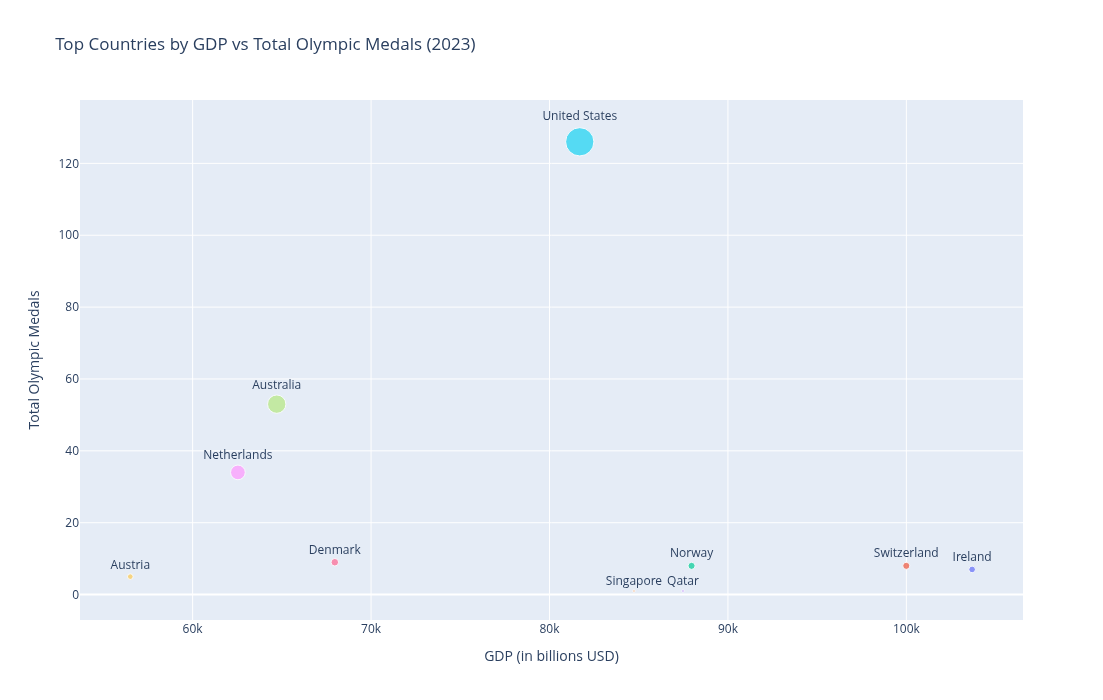

In [20]:
import pandas as pd
import os
import plotly.express as px

def load_olympics_data():
    """
    Load Olympics dataset from local or Kaggle environment.
    Returns:
        DataFrame: Olympics data with medals, GDP, and population.
    """
    env_name = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', 'Localhost')
    if env_name == "Localhost":
        df = pd.read_csv('../datasets/New/olympics-economics.csv', low_memory=False)
    else:
        df = pd.read_csv("/kaggle/input/olympics/olympics-economics.csv")
    return df

def get_top_gdp_countries(df, top_n=10, include_countries=None):
    """
    Get top N countries by GDP and optionally include specific countries.
    
    Args:
        df (DataFrame): Olympics data.
        top_n (int): Number of top GDP countries.
        include_countries (list): List of country names to always include.
        
    Returns:
        DataFrame: Filtered dataframe with top GDP countries + included countries.
    """
    # Clean 'country' column
    if 'country' not in df.columns:
        for col in df.columns:
            if col.lower() == 'country':
                df.rename(columns={col: 'country'}, inplace=True)
                break
    df['country'] = df['country'].astype(str).str.strip()

    # Sort and select top N
    top_df = df.sort_values(by='gdp', ascending=False).head(top_n)

    # Always include specified countries
    if include_countries:
        include_countries_clean = [c.strip() for c in include_countries]
        extra_df = df[df['country'].isin(include_countries_clean)]
        combined_df = pd.concat([top_df, extra_df], ignore_index=True)
        combined_df = combined_df.drop_duplicates(subset='country')
        combined_df = combined_df.sort_values(by='gdp', ascending=False).reset_index(drop=True)
    else:
        combined_df = top_df.reset_index(drop=True)

    return combined_df

def plot_gdp_vs_medals(df):
    """
    Plot a scatter plot of GDP vs Total Medals using Plotly.
    
    Args:
        df (DataFrame): Filtered Olympics data.
    """
    fig = px.scatter(df,
                     x='gdp',
                     y='total',
                     text='country',
                     size='total',
                     color='country',
                     hover_name='country',
                     labels={'gdp': 'GDP (in billions USD)', 'total': 'Total Medals'},
                     title='Top Countries by GDP vs Total Olympic Medals (2023)',
                     height=700,
                     width=1000)

    fig.update_traces(textposition='top center')
    fig.update_layout(xaxis_title='GDP (in billions USD)',
                      yaxis_title='Total Olympic Medals',
                      showlegend=False)
    fig.show()

# Main Execution
if __name__ == "__main__":
    # Load dataset
    df_olympics = load_olympics_data()
    
    # Countries to always include
    include_countries = ["Finland", "Pakistan"]

    # Get top GDP countries + includes
    top_gdp_df = get_top_gdp_countries(df_olympics, top_n=10, include_countries=include_countries)

    # Plot GDP vs Total Medals
    plot_gdp_vs_medals(top_gdp_df)
